# Forecasting housing prices using a neural network regression model

**Purpose of the work:**We need to predict the final price of each house from the available data on house prices, taking into account the characteristics of the houses using a neural network.




## 1. Information about the dataset
The description of the dataset contains 80 classes (a set of variables) of the housing type classification, and can be found in the file `data_description.txt`.

The work requires the addition of the section "Modeling" in the subsection "Model building and training" create and initialize a sequential neural network model using neural network training frameworks like: Torch or Tensorflow. Compile the neural network by selecting the loss function and optimizer respectively. Evaluate the accuracy of the results. Output the predicted sales data. 



## 2. Importing libraries
Import the required libraries:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 3. Read the dataset


Load the dataset and assign the following variables:

* `train_data`: data used to train the model
* `test_data`: data used to test the model

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Fall semester 2022/AI/lab 2/train.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/Fall semester 2022/AI/lab 2//test.csv', index_col=0)

## 4. Data preparation



### 4.1 Show the training and validation data:

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Он имеет 1460 записей, от 1 до 1460 и 80 столбцов. Мы получим столбец «SalePrice», создающий модель вывода.

In [6]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
## Output infomation
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [9]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


As you can see, `train_data` has one more column than `test_data`, which is the `SalePrice` column, to train the model before applying it to predict labels in test_data.

### 4.2 Check if test_data has missing values (NaN)

Build a function `def missing_value_checker` to check and count missing values in test_data. And also display the data type of these values.


In [10]:
def missing_value_checker(data: pd.DataFrame) -> dict:
    """
    It takes a dataframe as an input and returns a dictionary of features with
    missing values and the number of missing values
    
    :param data: the dataframe you want to check
    :type data: pd.DataFrame
    :return: A dictionary with the feature name as the key and the number of missing
    values as the value.
    """
    missing_dict = {} # {feature_name: missing_count}
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print(f'{feature}: {sum}, type: {type}')
            
            missing_dict[feature] = sum
    print(missing_dict)

    print(len(missing_dict))
    return missing_dict


missing_dict = missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 16, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
{'MSZoning': 4, 'LotFrontage': 227, 'Alle

Check which attributes in the table can be kept and which can be deleted. If there are too many missing values, we remove the attribute. If their number is small, then fill `mean` or `median` for numbers, a new category `missing` for string objects.

According to this:

- We will remove columns with missing values greater than 25% of the total number of samples..;

- We fill the numeric missing value with a `mean` value;

- fill the string missing value with the value `missing`.

In [11]:
def get_features_to_remove(input_data: pd.DataFrame,
                          missing_dict: dict, 
                          threshold: float) -> list:
    count_row = input_data.shape[0]
    features_to_remove = []
    for feature, missing_count in missing_dict.items():
        missing_rate = missing_count / count_row
        if missing_rate >= threshold:
            features_to_remove.append(feature)
    return features_to_remove
  
features_to_remove = get_features_to_remove(train_data, missing_dict, 0.25)
features_to_remove

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
train_edited = train_data.drop(features_to_remove, axis=1)

In [13]:
test_edited = test_data.drop(features_to_remove, axis=1)

In [14]:
def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### 4.3 Re-check our data:

In [15]:
missing_value_checker(test_edited)

{}
0


{}

In [16]:
missing_value_checker(train_edited)

{}
0


{}

In [17]:
train_edited.shape, test_edited.shape

((1460, 75), (1459, 74))

In [ ]:
train_edited.info()

In [ ]:
test_edited.info()

### 4.4 Data scaling

In [20]:
# scale
import sklearn

def scale(df: pd.DataFrame, scaler: sklearn.base.BaseEstimator) -> pd.DataFrame:
    columns = df.columns
    df[columns] = scaler.fit_transform(df[columns])
    return df
    

In [21]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

In [22]:
# Using min max scaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scale(X, scaler)
test_edited =scale(test_edited, scaler)

Check again

In [23]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
2,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
3,0.235294,0.75,0.160959,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
4,0.294118,0.75,0.133562,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
5,0.235294,0.75,0.215753,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [24]:
test_edited.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.000000,0.6,0.329609,0.184147,1.0,1.0,1.000000,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,1.0,0.8
1462,0.000000,0.8,0.335196,0.232124,1.0,0.0,1.000000,1.0,0.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,1.0,0.8
1463,0.235294,0.8,0.296089,0.224197,1.0,0.0,1.000000,1.0,1.0,0.0,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,1.0,0.8
1464,0.235294,0.8,0.318436,0.154326,1.0,0.0,1.000000,1.0,1.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,1.0,0.8
1465,0.588235,0.8,0.122905,0.064121,1.0,0.0,0.333333,1.0,1.0,0.0,...,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,1.0,0.8


### 4.4 Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train.shape, test_edited.shape

((1168, 74), (1459, 74))

## 5. Modeling

### 5.1 Model building and training


Create a consistent neural network model using neural network training frameworks Tensorflow.

**What is a "Dense" layer?** In any neural network, a dense layer is a layer that is closely related to the previous layer, which means that the neurons of the layer are connected to every neuron of the previous layer. This layer is the most commonly used layer in artificial neural networks.

**Rectified Linear Unit** - It allows only positive values to pass through. Negative values are mapped to zero.
$$f(s) = \max(0, s)$$
<p align="center">
  <img src="https://waksoft.susu.ru/wp-content/uploads/2021/11/relu1.png" />
</p>
ReLU has been proven to significantly accelerate Deep Networks learning (according to Krizhevsky et al.). The figure below compares the convergence of SGD using two different activation functions: ReLU and tanh. This acceleration is due to the fact that ReLU is computed almost instantaneously, and its gradient is also computed very quickly: the gradient is 1 if input is greater than 0, zero if input is less than 0.

<p align="center">
  <img src="https://machinelearningcoban.com/assets/14_mlp/alexplot.jpeg" />
</p>


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer
model.add(Input(shape=X_train.shape[1]))
# Hidden layers
model.add(Dense(64, activation='relu', name='layer_1'))
model.add(Dense(32, activation='relu', name='layer_2'))
model.add(Dense(16, activation='relu', name='layer_3'))
# Output layer
model.add(Dense(1, name='Output_layer'))


# замените None на колличество входных полносвязных слоёв, колличество нейронов
#, колличество выходов
#Для обеспечения воспроизводимости результатов устанавливается функция seed
tf.random.set_seed(40)

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                4800      
                                                                 
 layer_2 (Dense)             (None, 32)                2080      
                                                                 
 layer_3 (Dense)             (None, 16)                528       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 7,425
Trainable params: 7,425
Non-trainable params: 0
_________________________________________________________________


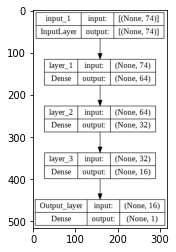

<Figure size 432x216 with 0 Axes>

In [71]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

plot_model(model, show_shapes=True, show_layer_names=True)
plt.imshow(mpimg.imread('model.png'))
plt.figure(figsize=(6,3))
plt.show()

Compile the neural network by selecting the loss function and optimizer accordingly.

#### **Loss function**

**Mean Square Error is the mean square of the error** of determining any value.
$${{MSE} ={\frac {1}{n}}\sum _{i=1}^{n}\left(y_{i}-{\hat {y_{i}}}\right)^{2}.}$$

**The mean absolute error (MAE)** is calculated as the average of the absolute differences between the target value and the value predicted by the model on a given training example during training:
$${\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}={\frac {\sum _{i=1}^{n}\left|e_{i}\right|}{n}}.}$$

**The root mean square error (RMSE)** shows how much the predicted values differ from the actual values. The formula for calculating RMSE:
$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big({\hat {y_i} -y_i}\Big)^2}}$$



#### **Optimizer**
One of the key components of **Adam** is exponentially weighted moving averages (also known as hole averages) for estimating momentum and gradient quadratic momentum. Specifically, he uses state variables
я
$$
\begin{split}\begin{aligned}
    \mathbf{v}_t & \leftarrow \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1) \mathbf{g}_t, \\
    \mathbf{s}_t & \leftarrow \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2) \mathbf{g}_t^2.
\end{aligned}\end{split}
$$
First, the gradient value is adjusted as follows:
$$\mathbf{g}_t' = \frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}.$$


And the upgrade step will be:
$$\mathbf{\theta}_t \leftarrow \mathbf{\theta}_{t-1} - \mathbf{g}_t'.$$

In [29]:
#Для оценки потерь и метрики рекомендую использовать метрики и функции потерь для регрессии.
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError

model.compile(loss='mse', optimizer='Adam', metrics=[RootMeanSquaredError()]) 

#### **Batch size**
The batch size is a hyperparameter that determines the number of samples that need to be processed before updating the internal parameters of the model.

Depending on the type of optimization algorithm, the sampling method with the number of batch sizes will be different.

#### **Epochs**
The number of epochs is a hyperparameter that determines how many times the learning algorithm will run through the whole set of training data.



#### **How it works**
The optimization algorithm divides the train_data set into samples with the number of each sample equal to batch_size, and the algorithm repeats the forward and back propagation processes for each sample. Then we compute the loss values and estimate the metrics by the average of all samples.


#### **Counter Overfitting with the Early Stopping method**
One popular method of combating Overfitting is Early Stopping.

Training with Early Stopping also means that we are less likely to stop training too early, before the network has finished learning the signal. So, in addition to preventing training too long when you are overtrained, stopping early can also prevent not training long enough when you are undertrained. Just set the training epochs to some large number (more than you need), and early stopping will take care of everything else.

#### Coding

In [30]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=500, # minimium amount of change to count as an improvement 1000/(mean=181000) <<
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True
)
#замените None на гиперпараметры вашей модели нейронной сети
history = model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                    batch_size=16,
                    epochs=150,
                    callbacks=[early_stopping]) 

Epoch 1/150
73/73 [==============================] - 3s 5ms/step - loss: 38369726464.0000 - root_mean_squared_error: 195881.9219 - val_loss: 41659568128.0000 - val_root_mean_squared_error: 204106.7500
Epoch 2/150
73/73 [==============================] - 0s 3ms/step - loss: 38225350656.0000 - root_mean_squared_error: 195513.0469 - val_loss: 41268461568.0000 - val_root_mean_squared_error: 203146.4062
Epoch 3/150
73/73 [==============================] - 0s 3ms/step - loss: 37257768960.0000 - root_mean_squared_error: 193022.7188 - val_loss: 39339008000.0000 - val_root_mean_squared_error: 198340.6250
Epoch 4/150
73/73 [==============================] - 0s 3ms/step - loss: 33964621824.0000 - root_mean_squared_error: 184294.9219 - val_loss: 33968762880.0000 - val_root_mean_squared_error: 184306.1562
Epoch 5/150
73/73 [==============================] - 0s 3ms/step - loss: 26827042816.0000 - root_mean_squared_error: 163789.6250 - val_loss: 24338423808.0000 - val_root_mean_squared_error: 156007.

**Compute the results**.

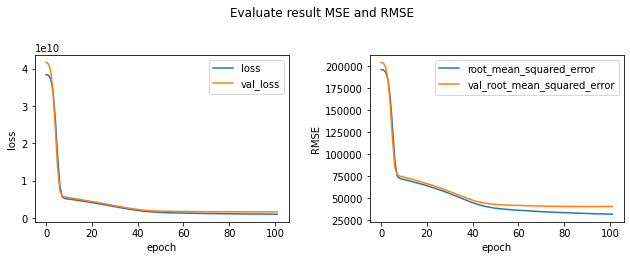

In [59]:
# pd.DataFrame(history.history).plot();
epochs = len(history.history['loss'])
fig, axs = plt.subplots(1,2, figsize=(10, 4))
fig.tight_layout(pad=5.0)
fig.suptitle('Evaluate result MSE and RMSE')

axs[0].plot(np.arange(epochs), history.history['loss'], label='loss')
axs[0].plot(np.arange(epochs), history.history['val_loss'], label='val_loss')
axs[0].legend()
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')

axs[1].plot(np.arange(epochs), history.history['root_mean_squared_error'], 
            label='root_mean_squared_error')
axs[1].plot(np.arange(epochs), history.history['val_root_mean_squared_error'], 
            label='val_root_mean_squared_error')
axs[1].legend()
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('RMSE')
plt.show()

In [32]:
scores = model.evaluate(X_val, y_val, verbose=1)

10/10 [==============================] - 0s 4ms/step - loss: 1632450432.0000 - root_mean_squared_error: 40403.5938


### 5.2 Prediction

In [33]:
preds = model.predict(test_edited)
preds

46/46 [==============================] - 0s 1ms/step


array([[ 93239.6 ],
       [138983.73],
       [170327.06],
       ...,
       [164554.52],
       [ 91797.84],
       [214315.73]], dtype=float32)

In [34]:
#Эту часть рекомендуется дополнить вам, для более информативного отображения результата предсказания.
output = pd.DataFrame(
{
    'Id':test_data.index,
    'SalePrice': np.squeeze(preds)
})
output
#print (output)

,Id,SalePrice
0,1461,93239.601562
1,1462,138983.734375
2,1463,170327.062500
3,1464,183161.671875
4,1465,149431.812500
...,...,...
1454,2915,45890.226562
1455,2916,44572.402344
1456,2917,164554.515625
1457,2918,91797.843750


In [74]:
# Save model and output 
model.save('house_regression_dnn.h5')

output.to_csv('output.csv')